In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

In [2]:
X,Y = make_classification(n_samples=400,n_features=2,n_informative=2,n_clusters_per_class=1,n_classes=2,n_redundant=0,random_state=3)

In [3]:
# Converting our labels into {1 and -1}
Y[Y==0] = -1

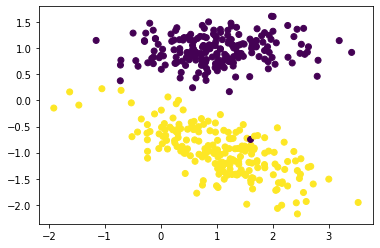

In [4]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

### Coding Support Vector Machines

In [5]:
class SVM:
    def __init__(self,C=1.0):
        self.C = C
        self.W = 0
        self.b = 0
    
    def HingeLoss(self,W,b,X,Y):
        loss = 0.0
        loss += 0.5*np.dot(W,W.T)
        
        m = X.shape[0]
        
        for i in range(m):
            ti = Y[i]*(np.dot(W,X[i].T)+b)
            loss += self.C*max(0,(1-ti))
        
        return loss[0][0]
    
    def fit(self,X,Y,batch_size=100,learning_rate=0.001,maxItr=300):
        n_features = X.shape[1]
        n_samples = X.shape[0]
        n = learning_rate
        c = self.C
        
        #Initializing the model parameters
        W = np.zeros((1,n_features))
        b = 0
        
        #print(self.HingeLoss(W,b,X,Y))
        
        # Training part
        # Updating Weight and Bias Update rule
        
        losses = []
        for i in range(maxItr):
            l = self.HingeLoss(W,b,X,Y)
            losses.append(l)
            ids = np.arange(n_samples)
            np.random.shuffle(ids)
            
            # Batch Gradient Descent with random shuffling
            for batch_start in range(0,n_samples,batch_size):
                # Assume 0 gradient for the batch
                gradw=0
                gradb=0
                
                # Iterate over all examples in the mini batch
                for j in range(batch_start,batch_start+batch_size):
                    if j<n_samples:
                        i = ids[j]

                        ti = Y[i]*(np.dot(W,X[i].T)+b)
                        
                        if ti>1:
                            gradw +=0
                            gradb +=0
                        else:
                            gradw += c*Y[i]*X[i]
                            gradb += c*Y[i]
                # Gradient for batch is ready! Update W,B
                W = W - n*W +n*gradw
                b = b + n*gradb
        
        
        self.W = W
        self.b = b
        return W,b,losses
            
            
        
        

In [6]:
obj = SVM()

In [7]:
W,b,losses = obj.fit(X,Y,maxItr=100)
print("Initial loss is: ",losses[0])
print("Final loss is: ",losses[-1])

Initial loss is:  400.0
Final loss is:  14.966772481999554


### Visualising the loss function

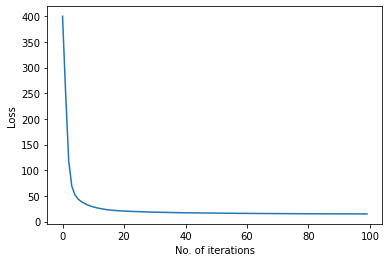

In [8]:
plt.plot(losses)
plt.xlabel("No. of iterations")
plt.ylabel("Loss")
plt.show()

In [9]:
W,B = obj.W,obj.b
# Learned parameters weight and bias
print(W,B)

[[-0.32295605 -2.0339465 ]] 0.38300000000000023


### Visualising Support Vectors, Positive and Negative Hyperplanes

In [10]:
def plotHyperplanes(w1,w2,b):
    plt.figure(figsize = (10,8))
    x_1 = np.linspace(-2,4,10)
    x_2 = -(w1*x_1+b)/w2 # W.T * X + B = 0
    
    x_p = -(w1*x_1+b+1)/w2 # W.T * X + B = 1
    x_n = -(w1*x_1+b-1)/w2 # W.T * X + B = -1
    plt.plot(x_1,x_2,label="Hyperplane W.T * X + B = 0")
    plt.plot(x_1,x_p,label="Hyperplane W.T * X + B = 1")
    plt.plot(x_1,x_n,label="Hyperplane W.T * X + B = -1")
    plt.scatter(X[:,0],X[:,1],c=Y)
    plt.legend()
    plt.show()

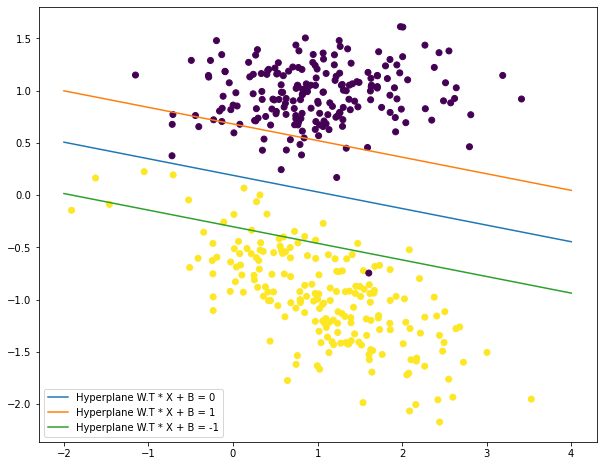

In [11]:
plotHyperplanes(W[0,0],W[0,1],B)

## Effect of changing the penalty constant C

In [12]:
obj2 = SVM(C=1000)
W,b,losses = obj2.fit(X,Y,maxItr=100)
print("Initial loss is: ",losses[0])
print("Final loss is: ",losses[-1])

Initial loss is:  400000.0
Final loss is:  16589.600874783482


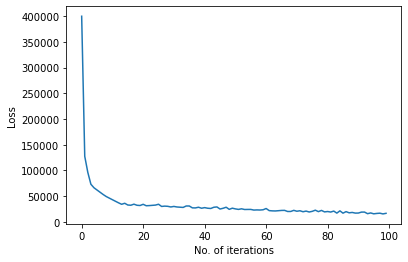

In [13]:
plt.plot(losses)
plt.xlabel("No. of iterations")
plt.ylabel("Loss")
plt.show()

### initial and final loss are still very high

In [14]:
W,B = obj2.W,obj2.b
print(W,B)

[[ -9.00663518 -31.09507309]] 4.0


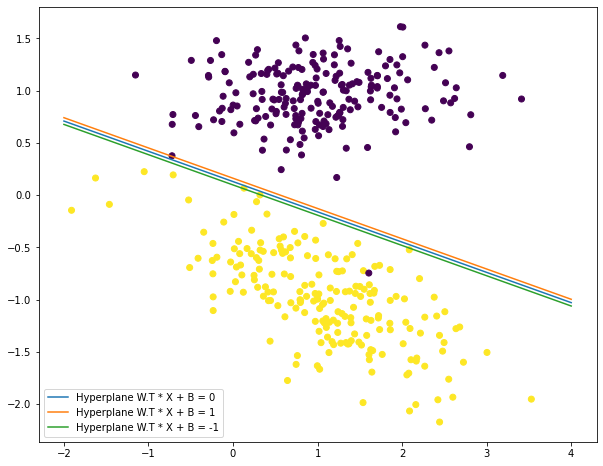

In [15]:
plotHyperplanes(W[0,0],W[0,1],B)

##### We can notice on making the cost term high, our hyperplane tries to correctly classify all of the samples at the cost of reduced margin and thus it is more prone to overfitting.